# 1 敗血症の回復時におけるT-Cellの役割の数理モデル（仮称）

敗血症の回復時においてマイクログリアからのIL4が主役となり炎症を抑制（？）しているというのがこれまでの視点．（雅史：仮説）回復時においてT-CellもIL4を算出しているので，このT-Cellの役割も無視できないのでは？
この仮説を簡単化した数理モデルで表し，まずは実験で示されているIL4の時系列データを定性的に再現する．

$$
\begin{align*}
\frac{dM_{1}(t)}{dt} &= \alpha f_1(t)- \beta f_2(M_1, T_{reg}) \\
\frac{dM_2(t)}{dt} &= \beta f_2(M_1, T_{reg}) \\
\frac{dT_{reg}}{dt} &= C

\end{align*}
$$

$M_1$：炎症性？マイクログリア，$M_2$：抗炎症性マイクログリア，$T_{reg}$：脳にあるT-Cell，$\alpha, \beta$：比例定数，$C$：正の定数

実験結果から次の条件を仮定する．
- $ t \rightarrow \infty $のとき$M_1+M_2$は保存される．
- $M_1(t)$は上限のある単調増加関数
- $f_2(M_1, T_{reg})$は$M_1$と$T_{reg}$に比例（質量作用の法則より）

ここでは簡単な例として，以下の関数形をとる．
- $f_1(t) := \gamma \exp(-\gamma t)$
- $f_2(M_1, T_{reg}):= M_1T_{reg}$

[0.0, 0.0014859407353548667, 0.014013659808464056, 0.039081167948972095, 0.07268501102327207, 0.11810921576505798, 0.17803741238304777, 0.2567272040718006, 0.3595192885707664, 0.4948498023309611, 0.6763195199957254, 0.929232782864423, 1.305432982208618, 1.9171804827725625, 2.7272064766073387, 3.7116896731406457, 4.956797654594921, 6.222124509988414, 7.34899497613438, 8.44762897728462, 9.46446179045881, 10.0]

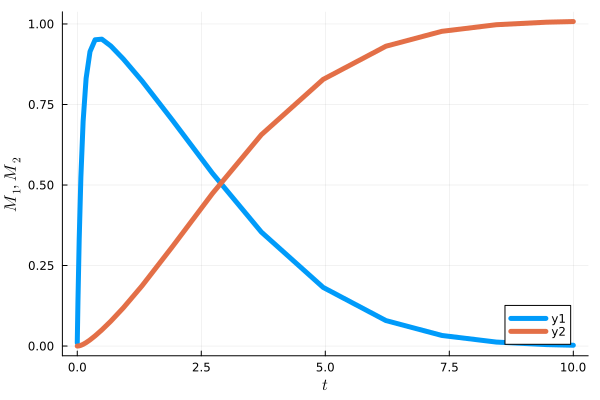

In [12]:
using DifferentialEquations, Plots, LaTeXStrings

function sepsis1(du, u, p, t)
    γ=10
    α=1
    β=0.1
    C=1
   
    du[1]=α*γ*exp(-γ*t)-β*u[1]*u[3]
    du[2]=β*u[1]*u[3]
    du[3]=C
end

function main()
    u0=[0.01, 0.0, 1.0]
    tspan=(0.0, 10.0)
    prob=ODEProblem(sepsis1,u0,tspan)
    sol=solve(prob)
    
    # u[] の時間変化を抽出
    u1_values = [row[1] for row in sol.u]
    u2_values = [row[2] for row in sol.u]
    print(sol.t)
    # 時間と u[1] の値をプロット
    plot(sol.t, u1_values, width=5, xlabel=L"t", ylabel=L"$M_1, M_2$")
    plot!(sol.t, u2_values, width=5)
end

main()